In [41]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [42]:
data = pd.read_csv("recent_grads.csv")
data.set_index("Rank", inplace=True)
data.head(5)

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


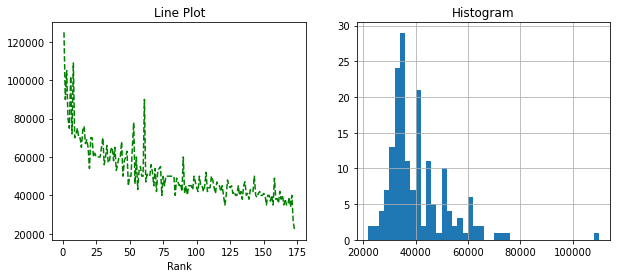

In [43]:
fig = plt.figure(figsize=(10, 4))
#first subplot - P75th column
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Line Plot')
data['P75th'].plot(ax=ax1, style='--g')
#second subplot - Median column
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Histogram')
med_bins = np.arange(data['Median'].min(), data['Median'].max()+200, 2000)
data['Median'].hist(ax=ax2, bins=med_bins)

plt.subplots_adjust(hspace=5)

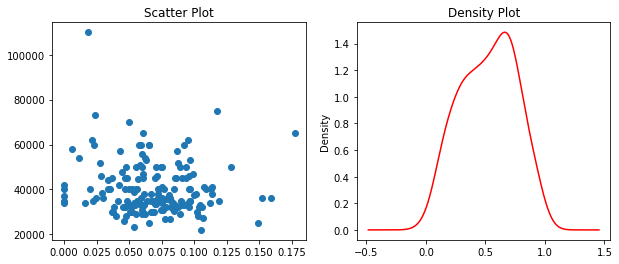

In [44]:
fig = plt.figure(figsize=(10, 4))

#subplot 1 - compares Unemployment_rate to Median
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Scatter Plot')
ax1.scatter(data['Unemployment_rate'], data['Median'])

#subplot 2 density of ShareWomen
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Density Plot')
data['ShareWomen'].plot.density(ax=ax2, style='r')

plt.subplots_adjust(hspace=5)

<AxesSubplot:title={'center':'Top Median Incomes'}, xlabel='Major'>

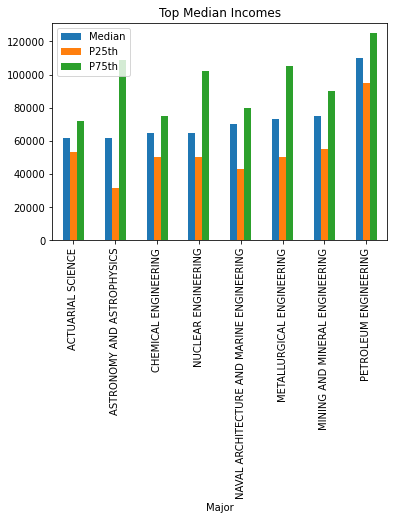

In [45]:
top_medians = data[data['Median'] > 60000]
top_medians = top_medians[['Major', 'Median', 'P25th', 'P75th']]
top_medians = top_medians.set_index('Major')
top_medians = top_medians.sort_values(by=['Median'])

top_medians.plot.bar(title='Top Median Incomes')

<AxesSubplot:title={'center':'Top Median Incomes'}, ylabel='Major'>

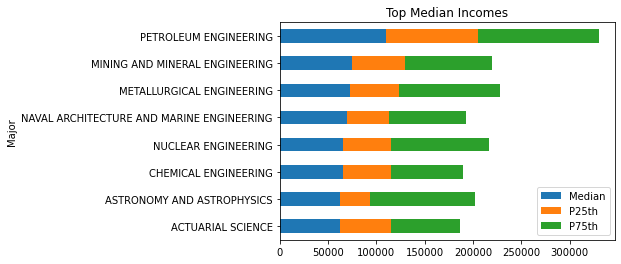

In [46]:
top_medians.plot.barh(title='Top Median Incomes', stacked=True)

<AxesSubplot:title={'center':'Median Income for Engineering Majors'}, ylabel='Frequency'>

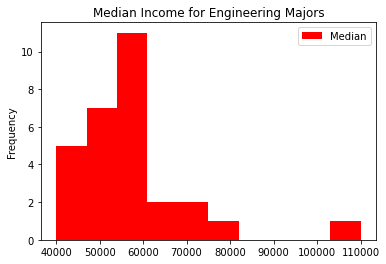

In [47]:
engineering_data = data.set_index('Major_category')
engineering_data = engineering_data.filter(like='Engineering', axis=0)
engineering_data = engineering_data.set_index('Major')
engineering_data.plot.hist(y=['Median'], title='Median Income for Engineering Majors', color='r')

In [48]:
#distribution of job earnings
dist_data = data[['College_jobs', 'Non_college_jobs', 'Low_wage_jobs']]
dist_data.head(5)

,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,
1,1534,364,193
2,350,257,50
3,456,176,0
4,529,102,0
5,18314,4440,972


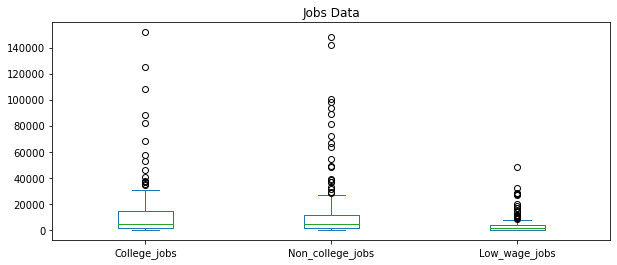

In [49]:
box_fig=plt.figure(figsize=(10,4))
ax1=box_fig.add_subplot(1,1,1)
box=dist_data.plot.box(title='Jobs Data', ax=ax1)

In [50]:
#pair plot table
pair_data = data[['Median', 'ShareWomen', 'Unemployment_rate', 'College_jobs']]
pair_data.head(5)

,Median,ShareWomen,Unemployment_rate,College_jobs
Rank,,,,
1,110000,0.120564,0.018381,1534
2,75000,0.101852,0.117241,350
3,73000,0.153037,0.024096,456
4,70000,0.107313,0.050125,529
5,65000,0.341631,0.061098,18314


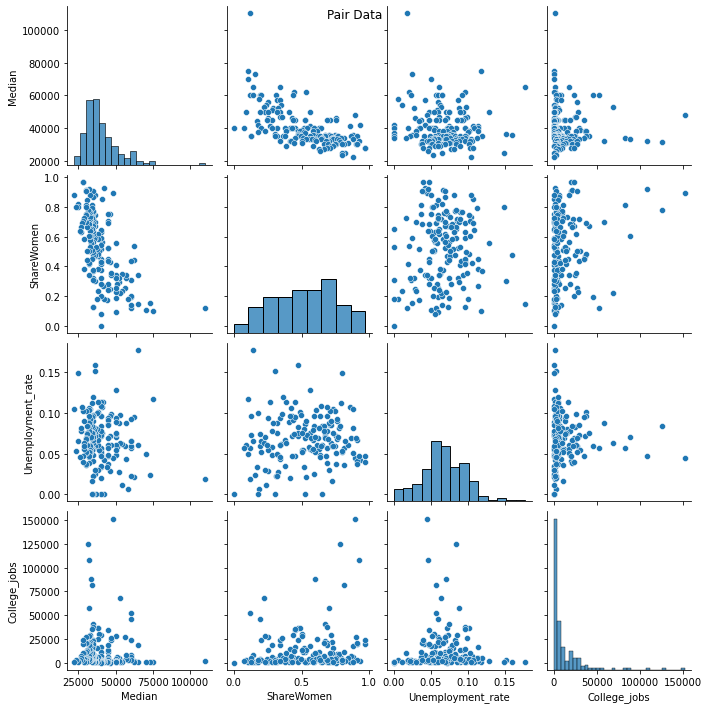

In [51]:
#pair plot
pair_plot = sns.pairplot(pair_data)
pair_plot = pair_plot.figure.suptitle('Pair Data')
pair_plot.figure.set_size_inches(10, 10)

In [52]:
#percent of women in each major data
grouped_data = data.groupby('Major_category')
pct_women = pd.Series(grouped_data['ShareWomen'].mean(), name='')
pct_women

Major_category
Agriculture & Natural Resources        0.405267
Arts                                   0.603658
Biology & Life Science                 0.587193
Business                               0.483198
Communications & Journalism            0.658384
Computers & Mathematics                0.311772
Education                              0.748507
Engineering                            0.238889
Health                                 0.795152
Humanities & Liberal Arts              0.631790
Industrial Arts & Consumer Services    0.349523
Interdisciplinary                      0.770901
Law & Public Policy                    0.483649
Physical Sciences                      0.508683
Psychology & Social Work               0.794397
Social Science                         0.553962
Name: , dtype: float64

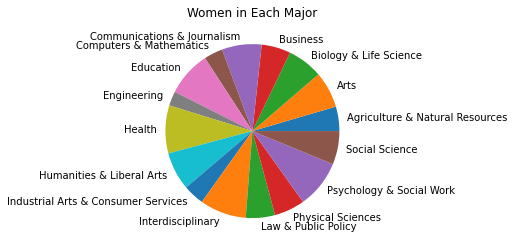

In [53]:
#percent of women in each major pie chart
pie_fig=plt.figure(figsize=(10,4))
pie_fig.set_facecolor('w')
ax1=pie_fig.add_subplot(1,1,1)

women_pie = pct_women.plot.pie(title='Women in Each Major', ax=ax1)
